In [1]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D,Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 64

train_data_dir = './fer2013/train/'
validation_data_dir = './fer2013/validation/'


In [3]:
#Arranges the dataset of pictures between the training and validations. Makes sure that the images are all the same format
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=10,
					zoom_range=0.1,
					width_shift_range=0.1,
					height_shift_range=0.1,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 28789 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [4]:
print(train_generator.class_indices)


{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [4]:
#the 6-layer model 
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
 
model.add(Dense(7, activation='softmax'))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)      

In [5]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.callbacks import CSVLogger

#Sets the batch size, epochs and patience
batch_size = 128
num_epochs = 1000
patience = 25

#stops the program if the accuracy doesn't improve after 25 cycles
early_stop = EarlyStopping('accuracy', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,         patience=int(patience/4),verbose=1)
model_names ='Emotions02.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'accuracy', verbose=1,                                         save_best_only=True)

callbacks = [model_checkpoint,  early_stop, reduce_lr]




model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

nb_train_samples = 28789
nb_validation_samples = 3589

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=num_epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/30
224/224 [==============================] - 143s 639ms/step - loss: 1.8170 - accuracy: 0.2508 - val_loss: 1.7521 - val_accuracy: 0.2511

Epoch 00001: val_accuracy improved from -inf to 0.25112, saving model to Emotions02.hdf5
Epoch 2/30
224/224 [==============================] - 157s 701ms/step - loss: 1.7706 - accuracy: 0.2663 - val_loss: 1.7420 - val_accuracy: 0.3058

Epoch 00002: val_accuracy improved from 0.25112 to 0.30580, saving model to Emotions02.hdf5
Epoch 3/30
224/224 [==============================] - 150s 670ms/step - loss: 1.6974 - accuracy: 0.3174 - val_loss: 1.5474 - val_accuracy: 0.3514

Epoch 00003: val_accuracy improved from 0.30580 to 0.35141, saving model to Emotions02.hdf5
Epoch 4/30
224/224 [==============================] - 151s 672ms/step - loss: 1.6351 - accuracy: 0.3613 - val_loss: 1.4540 - val_accuracy: 0.3996

Epoch 00004: val_accuracy improved from 0.35141 to 0.39955, saving model to Emotions02.hdf5
Epoch 5/30
224/224 [===========================

In [6]:
import matplotlib.pyplot as plt
from keras.models import load_model

model = load_model("Emotions02.hdf5")


Found 3589 images belonging to 7 classes.
Confusion Matrix
[[182   2  72  36  48 138  13]
 [ 29   2   4   4   1  12   3]
 [ 62   1 145  43  56 152  69]
 [ 19   0  41 714  26  63  16]
 [102   0  70 152  97 144  61]
 [ 46   1  58  57  79 341  12]
 [ 14   0  79  29   8  20 266]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.40      0.37      0.39       491
     Disgust       0.33      0.04      0.07        55
        Fear       0.31      0.27      0.29       528
       Happy       0.69      0.81      0.75       879
     Neutral       0.31      0.15      0.21       626
         Sad       0.39      0.57      0.47       594
    Surprise       0.60      0.64      0.62       416

    accuracy                           0.49      3589
   macro avg       0.43      0.41      0.40      3589
weighted avg       0.46      0.49      0.46      3589



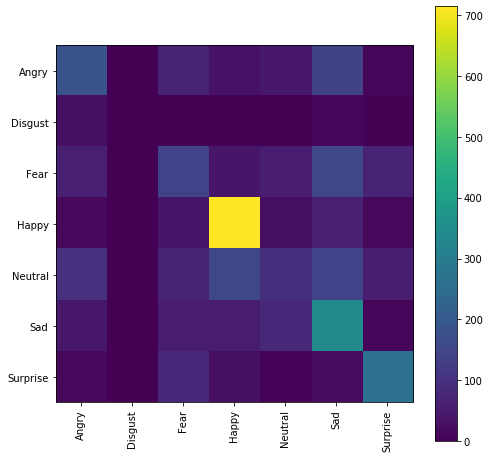

In [7]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# makes a prediction to see how accurate the model is
nb_train_samples = 28789
nb_validation_samples = 3589

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)